Whenever someone asks you “How a ChatBot works?” usually people think of some complicated sequence to sequence learning model, which actually understands the question and forms the answer. But what if I tell you that you don’t require knowledge about deep neural networks to create a ChatBot. You can simple create a ChatBot using basic Machine Learning algorithms such as Text Classification and Text Similarity.


# STEP1

Understanding the business problem and translating it to a technical manual — So our business problem is to create a ChatBot, a ChatBot is a question answering bot which answers us back based on the question we ask it. Now let’s think how can we technically approach this problem. Let us have several questions and answers in our training set such that the ChatBot can simply match the new question with the training set. For that we would categorize similar questions in our training set into a single class. So now when we get a new question we can simple classify it to one of the classes in our training data and give answer as the text which is a usual answer for questions belonging to this type of class.

Our second approach would be to match our new question with all the questions in the training set and find the most similar question in the training set. Thus the answer should also be same for them.

Collecting Data- This is the most tedious part of your model, collecting data from various sources and accumulating them. But this is what would help in improving the predictivity of your ChatBot. The better the data you collect the better your ChatBot would respond.

Defining the Objective Function — In our business problem the objective function is to classify the question to a class.

# STEP2

Visualising your data- Once you have the data in your Jupyter Notebook the first thing you do is that you understand what type of data you have. In our case we are dealing with text thus we would intuitively want to know what are the most common words used in our questions. For that we would be using :

# Firstly load the data into your Notebook and start exploring it

In [111]:
import os
import pandas as pd
os.chdir('E:\\python\\csv files')
data=pd.read_csv('Data_chatbot.csv')
data

,question,answer
0,how are you doing today ?,greeting
1,how is your day ?,greeting
2,good day,greeting
3,good morning,greeting
4,Hope you have a lovely and beautiful morning,greeting
5,What a beautiful and pleasant day,greeting
6,Have a pleasant morning,greeting
7,what a lovely morning,greeting
8,how is it going today ?,greeting
9,have a nice day,goodbye


In [112]:
##### Visualize your Data(daat_exploration)
print ("Let's explore our question set",data["question"])
print ("Length of training set",len(data["question"]))
print ("Unique answers are",set(data["answer"]),"and number of unique answers are", len(set(data["answer"])))


Let's explore our question set 0                        how are you doing today ?
1                                how is your day ?
2                                         good day
3                                     good morning
4     Hope you have a lovely and beautiful morning
5                What a beautiful and pleasant day
6                          Have a pleasant morning
7                            what a lovely morning
8                          how is it going today ?
9                                  have a nice day
10                                   see you later
11                                      good night
12                                         bye bye
13                               talk to you later
14                          see you sometime later
15                                 have a nice day
16                                talk to you soon
17                              make me a sandwich
18                      can you make a sandwitch ?


# WordClouds

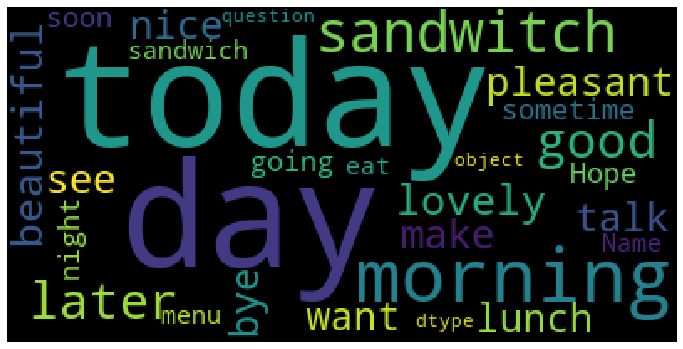

In [113]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(data['question'])    


# Plot word frequencies using Counter function

In [114]:
##### Let's change the list of questions into list of words for better visualization
word_list=[]
list_question=list(data["question"])
for sentence in list_question:
    words_sentence=sentence.split()
    for words in words_sentence:
        word_list.append(words)


word_list=[word for sentence in list(data["question"]) for word in sentence.split()]
print(word_list)

['how', 'are', 'you', 'doing', 'today', '?', 'how', 'is', 'your', 'day', '?', 'good', 'day', 'good', 'morning', 'Hope', 'you', 'have', 'a', 'lovely', 'and', 'beautiful', 'morning', 'What', 'a', 'beautiful', 'and', 'pleasant', 'day', 'Have', 'a', 'pleasant', 'morning', 'what', 'a', 'lovely', 'morning', 'how', 'is', 'it', 'going', 'today', '?', 'have', 'a', 'nice', 'day', 'see', 'you', 'later', 'good', 'night', 'bye', 'bye', 'talk', 'to', 'you', 'later', 'see', 'you', 'sometime', 'later', 'have', 'a', 'nice', 'day', 'talk', 'to', 'you', 'soon', 'make', 'me', 'a', 'sandwich', 'can', 'you', 'make', 'a', 'sandwitch', '?', 'having', 'a', 'sandwitch', 'today', '?', "what's", 'for', 'lunch?', 'I', 'want', 'to', 'eat', 'a', 'sandwitch', 'today', 'I', 'do', 'not', 'want', 'a', 'sandwitch', 'today', 'What', 'is', 'in', 'the', 'menu', 'What', 'is', 'for', 'lunch']


In [115]:
##### Now let's find the frequency of each word and the most common words in the corpus
frequency=Counter(word_list)
print (frequency)
print (frequency.most_common(5))

Counter({'a': 11, 'you': 7, 'today': 5, '?': 5, 'day': 5, 'is': 4, 'morning': 4, 'sandwitch': 4, 'how': 3, 'good': 3, 'have': 3, 'What': 3, 'later': 3, 'to': 3, 'lovely': 2, 'and': 2, 'beautiful': 2, 'pleasant': 2, 'nice': 2, 'see': 2, 'bye': 2, 'talk': 2, 'make': 2, 'for': 2, 'I': 2, 'want': 2, 'are': 1, 'doing': 1, 'your': 1, 'Hope': 1, 'Have': 1, 'what': 1, 'it': 1, 'going': 1, 'night': 1, 'sometime': 1, 'soon': 1, 'me': 1, 'sandwich': 1, 'can': 1, 'having': 1, "what's": 1, 'lunch?': 1, 'eat': 1, 'do': 1, 'not': 1, 'in': 1, 'the': 1, 'menu': 1, 'lunch': 1})
[('a', 11), ('you', 7), ('today', 5), ('?', 5), ('day', 5)]


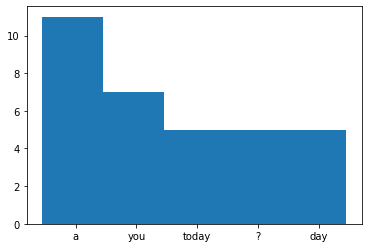

In [116]:
import numpy as np

labels,values = zip(*frequency.items())
labels=[]
values=[]
for T in frequency.most_common(5):
    labels.append(T[0])
    values.append(T[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.05, labels)
plt.show()

# STEP3

Pre processing your data- Data is always noisy. So it is very important to clean it and only retain the information required for creating the model. The data pre processing/cleaning steps which we are going to do today are :-

# Punctuations Removal
 — Let’s remove punctuations because in my data the punctuations does not convey any meaning

In [117]:
### Remove Punctuations and change words to lower case
import re
def remove_punctuations(text):    
    words=[word.lower() for word in text.split()] 
    words=[w for word in words for w in re.sub(r'[^\w\s]','',word).split()]    
    return words

data["question_punctuation_removed"]=data["question"].apply(remove_punctuations)
print (data["question_punctuation_removed"])

0                         [how, are, you, doing, today]
1                                  [how, is, your, day]
2                                           [good, day]
3                                       [good, morning]
4     [hope, you, have, a, lovely, and, beautiful, m...
5              [what, a, beautiful, and, pleasant, day]
6                          [have, a, pleasant, morning]
7                            [what, a, lovely, morning]
8                           [how, is, it, going, today]
9                                  [have, a, nice, day]
10                                    [see, you, later]
11                                        [good, night]
12                                           [bye, bye]
13                               [talk, to, you, later]
14                          [see, you, sometime, later]
15                                 [have, a, nice, day]
16                                [talk, to, you, soon]
17                              [make, me, a, sa

# Stop Words removal

Let’s remove stopwords because these words usually support the main words and they themselves do not convey much information in the sentence.

In [118]:
### Remove StopWords
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print (stop)
def remove_stopwords(text):
    modified_word_list=[word for word in text if word not in stop]
    return modified_word_list

data["question_stopword_removed"]=data["question_punctuation_removed"].apply(remove_stopwords)
print (data["question_stopword_removed"])

{'above', "should've", "hasn't", 've', 'won', 'mightn', 'yourselves', 'their', 'are', 'but', "it's", 'hasn', 'further', 'a', 'over', "couldn't", "don't", 'isn', 'few', 'needn', 'me', 'same', 'from', 'during', 'were', 'up', 'how', "shouldn't", 'about', 'doing', 'was', 'into', 'yourself', 'on', "she's", 'those', 'the', 'with', 'again', 'he', 'not', 'weren', "wouldn't", 'before', 'against', 'ours', 'it', 'have', 'this', 'of', 'm', 'other', "haven't", "weren't", "isn't", "you'd", 'at', 'i', 'o', 'don', 'some', 'why', "shan't", "that'll", 'between', "mightn't", 'as', 'in', 'theirs', 'very', 'couldn', 'is', 'our', 'him', 'after', 'what', 'wouldn', "mustn't", "you're", 's', 'hadn', 'shan', 'until', 'so', 'each', 'below', 'does', 'hers', 'here', 'there', 'just', 'through', 'they', 'for', 'having', 'an', "hadn't", 'ma', 'while', "aren't", 'ain', 'them', 'am', "doesn't", 'only', 'did', 'shouldn', 'where', 'can', 'then', "didn't", 'll', 'haven', 'such', 'doesn', 'these', 're', 'y', 'has', 'you', 

# Negation Handling
We will be changing negative words like “not”, ”haven’t”, “didn’t”etc by clubbing them with the next word and adding a not before them. For example — “I don’t like you” is changed to “I not_like you” . This is important because when we would be tokenising (splitting the words) as features ,the words“don’t” and “like” would be treated differently but now tokenising would treat ”not_like” as a single word.

In [119]:
def negation_handling(words):
    counter=False    
    wlist=[]    
    negations=["no","not","cant","cannot","never","less","without","barely","hardly","rarely","no","not","noway","didnt"]
    #for words in wordlist:       
    for i,j in enumerate(words):                           
            if j in negations and i<len(words)-1:             
                wlist.append(str(words[i]+'-'+words[i+1]))
                counter=True
            else:
                if counter is False:                
                    wlist.append(words[i])
                else:
                    counter=False
    return wlist

data["question_negated"]=data["question_punctuation_removed"].apply(negation_handling)
print (data["question_negated"])

0                         [how, are, you, doing, today]
1                                  [how, is, your, day]
2                                           [good, day]
3                                       [good, morning]
4     [hope, you, have, a, lovely, and, beautiful, m...
5              [what, a, beautiful, and, pleasant, day]
6                          [have, a, pleasant, morning]
7                            [what, a, lovely, morning]
8                           [how, is, it, going, today]
9                                  [have, a, nice, day]
10                                    [see, you, later]
11                                        [good, night]
12                                           [bye, bye]
13                               [talk, to, you, later]
14                          [see, you, sometime, later]
15                                 [have, a, nice, day]
16                                [talk, to, you, soon]
17                              [make, me, a, sa

# POS based preprocessing
Usually we have seen that the Nouns, Adjective, Adverbs and Verbs present in the sentence usually depicts the important key terms in the sentence such as the subject, action or intensity of the action. Thus in our pre processing step we would only keep Nouns, Verbs , Adjectives and Adverbs and remove words belonging to other part of speeches.

In [120]:
# from nltk.tag import pos_tag
def descriptive_words(words):
    meaningful_words=[]    
    tags=['VB','VBP','VBD','VBG','VBN','JJ','JJR','JJS','RB','RBR','RBS','UH',"NN",'NNP']    
    tagged_word=pos_tag(words)
    for word in tagged_word:            
        if word[1] in tags:
            meaningful_words.append(word[0])
    return meaningful_words 
data["question_descriptive"]=data["question_negated"].apply(descriptive_words)
print (data["question_descriptive"])

0                          [are, doing, today]
1                                        [day]
2                                  [good, day]
3                              [good, morning]
4     [hope, have, lovely, beautiful, morning]
5                   [beautiful, pleasant, day]
6                    [have, pleasant, morning]
7                            [lovely, morning]
8                               [going, today]
9                            [have, nice, day]
10                                [see, later]
11                               [good, night]
12                                  [bye, bye]
13                               [talk, later]
14                      [see, sometime, later]
15                           [have, nice, day]
16                                [talk, soon]
17                            [make, sandwich]
18                           [make, sandwitch]
19                  [having, sandwitch, today]
20                                     [lunch]
21           

# Stemming of Words

In [121]:
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()
def Stemming(text):
    stemmed_words=[st.stem(word) for word in text] 
    return stemmed_words

data["question_stemmed"]=data["question_descriptive"].apply(Stemming)
print (data["question_stemmed"])

0                     [are, do, today]
1                                [day]
2                          [good, day]
3                         [good, morn]
4     [hope, have, love, beauti, morn]
5              [beauti, pleasant, day]
6               [have, pleasant, morn]
7                         [love, morn]
8                          [go, today]
9                    [have, nice, day]
10                        [see, later]
11                       [good, night]
12                          [bye, bye]
13                       [talk, later]
14               [see, sometim, later]
15                   [have, nice, day]
16                        [talk, soon]
17                    [make, sandwich]
18                   [make, sandwitch]
19            [have, sandwitch, today]
20                             [lunch]
21    [i, want, eat, sandwitch, today]
22    [do, not-want, sandwitch, today]
23                              [menu]
24                             [lunch]
Name: question_stemmed, d

# Recreating the sentence

In [122]:
def Recreate(text):
    word=" ".join(text)
    return word

data["modified_sentence"]=data["question_stemmed"].apply(Recreate)
print (data["modified_sentence"])

0                    are do today
1                             day
2                        good day
3                       good morn
4      hope have love beauti morn
5             beauti pleasant day
6              have pleasant morn
7                       love morn
8                        go today
9                   have nice day
10                      see later
11                     good night
12                        bye bye
13                     talk later
14              see sometim later
15                  have nice day
16                      talk soon
17                  make sandwich
18                 make sandwitch
19           have sandwitch today
20                          lunch
21     i want eat sandwitch today
22    do not-want sandwitch today
23                           menu
24                          lunch
Name: modified_sentence, dtype: object


In [123]:

def Cleaning(text):
    text_punctuation_removed=remove_punctuations(text)
    #text_stopword_removed=remove_stopwords(text_punctuation_removed)
    text_unnegated=negation_handling(text_punctuation_removed)
    text_descriptive=descriptive_words(text_unnegated)
    text_stemmed=Stemming(text_descriptive)
    final_text=Recreate(text_stemmed)
    return final_text
data["modified_sentence"]=data["question"].apply(Cleaning)
print (data["modified_sentence"])

0                    are do today
1                             day
2                        good day
3                       good morn
4      hope have love beauti morn
5             beauti pleasant day
6              have pleasant morn
7                       love morn
8                        go today
9                   have nice day
10                      see later
11                     good night
12                        bye bye
13                     talk later
14              see sometim later
15                  have nice day
16                      talk soon
17                  make sandwich
18                 make sandwitch
19           have sandwitch today
20                          lunch
21     i want eat sandwitch today
22    do not-want sandwitch today
23                           menu
24                          lunch
Name: modified_sentence, dtype: object


# change the sentence into a bag of word model

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["question"]).toarray()
print(X)
print(vectorizer.get_feature_names())

[[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
['and', 'are', 'beautiful', 'bye', 'can', 'day', 'do', 'doing', 'eat', 'for', 'going', 'good', 'have', 'having', 'hope', 'how', 'in', 'is', 'it', 'later', 'lovely', 'lunch', 'make', 'me', 'menu', 'morning', 'nice', 'night', 'not', 'pleasant', 'sandwich', 'sandwitch', 'see', 'sometime', 'soon', 'talk', 'the', 'to', 'today', 'want', 'what', 'you', 'your']


# Step4
Prepare data for model- We have our data in sentence format, where every sentence contains different number of words. But the input to any model has to be constant, thus we would be changing our data of sentences into data of Bag of Words. You can read more about Bag of Word out here.

There is one more word embedding known as Tf-idf (Term Frequency Inverse Term Frequency) which can give a better predictivity than the Bag of Words embedding because it gives more weight to important words and less weightage to common words. You can read more about Tf-Idf here.

Scikit Learn comes with a wonderful feature of Pipeline. So a pipeline becomes a network between your algorithms. You just need to tell it which algorithm is going to occur after which one in the series. It automatically creates the pipeline for you thus you don’t need to manually take output from each model and input to another one.

# Tf-idf transformation and DataPipelines

In [125]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer

model = Pipeline([('vectoizer', CountVectorizer()),('tfidf', TfidfTransformer())])

X_train = model.fit_transform(data["modified_sentence"]).toarray()
print(X_train)

[[0.66458888 0.         0.         0.         0.58900082 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.45978218 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.65152087 0.         0.
  0.         0.75863071 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.7350886  0.         0.         0.         0.
  0.         0.    

# Text Classification
Now once we have our input ready we can now start training our model. The Classification algorithms which we would be using here are:
- Logistic Regression
- Multinomial Naïve Bayes Classifier
- Decisson Tree

Ensemble Model- Ensembling is a technique where you take the output from several models and ensemble them together to create one model. So we have created 4 models let’s ensemble them together. Let the answer of my ChatBot be the answer which has been predicted by maximum number of models.

In [39]:
Y=data["answer"]
question="What a good day"

In [40]:
### Let's create our first Classification model

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression().fit(X_train, Y)


P=model.transform([Cleaning(question)])
predict1=clf1.predict(P)
print (predict1)

C:\Users\TEJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TEJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['greeting']


In [41]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict2=clf2.predict(P)
print (predict2)

['greeting']


In [42]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict3=clf3.predict(P)
print (predict3)

['greeting']


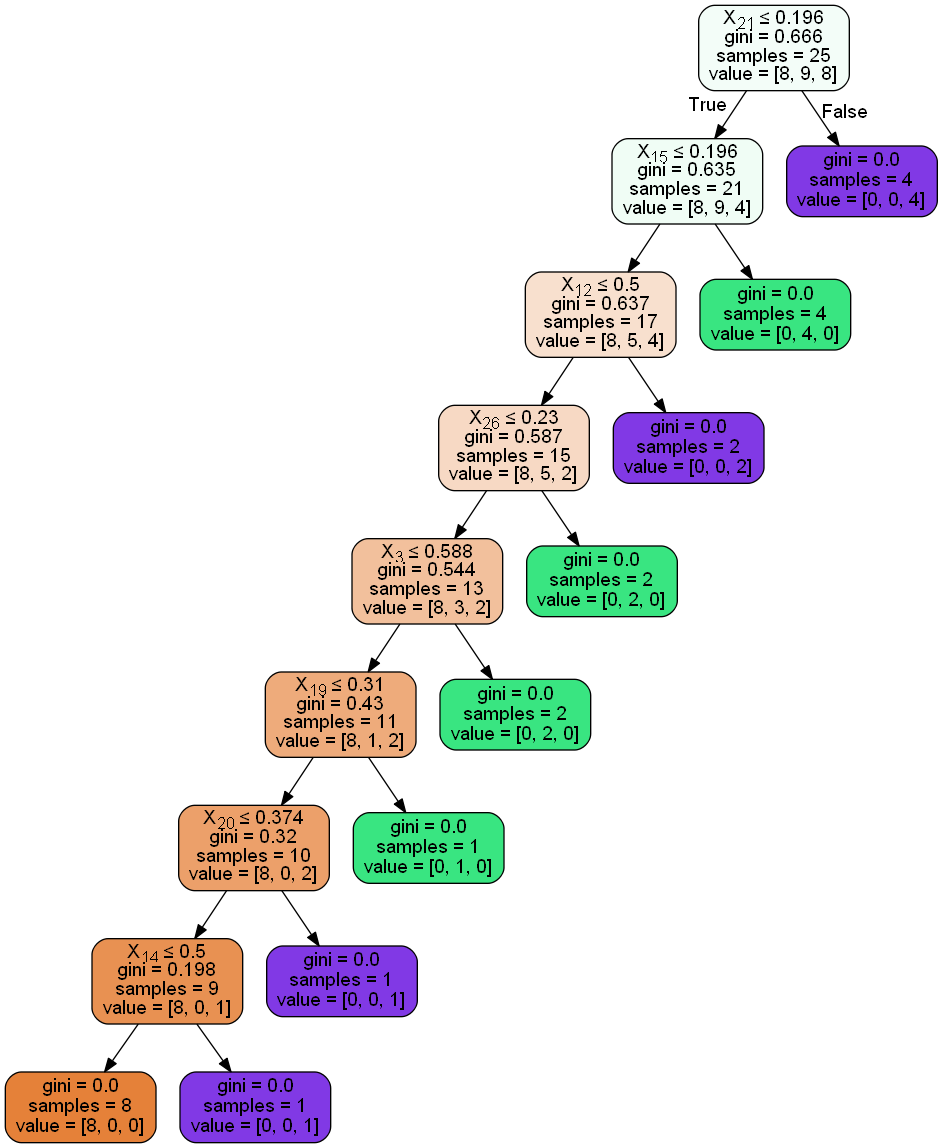

In [44]:
from sklearn import tree
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print (graph)
graph.write_pdf("iris.pdf")
from IPython.display import Image

Image(graph.create_png())

# Text Similarity model

So how do we find the most similar question in the training set to my input question. After applying Tf-idf on the question ; my question has been transferred into a 1 D array and similarly all other questions in the training set. So how do we compare similarity between 2 arrays? We take the dot product between two arrays it gives us a measure of similarity between the 2 arrays. Similarly, we will find the dot product between the input question array and all the other question arrays in the training set. The highest dot product would tell us the most similar questions.

# Answer Generation
Once you have figured out to which class your question belongs to, the next step is to figure out a suitable answer for your question. Firstly list out possible answers for every class. Now we would randomly generate one of these answers when the input question is classified to the corresponding class.

In [127]:
final_predict=[]
final_predict=list(predict1)+list(predict2)+list(predict3)
final_predict = Counter(final_predict)
print ("Thus answer to your question is",final_predict.most_common(1)[0][0])

Thus answer to your question is greeting


In [128]:
def Predict(text):
    P=model.transform([Cleaning(text)])
    predict1=clf1.predict(P)
    #print (predict1)

    predict2=clf2.predict(P)
    #print (predict2)
    
    predict3=clf3.predict(P)
    #print (predict3)
    
    final_predict=[]
    final_predict=list(predict1)+list(predict2)+list(predict3)
    final_predict = Counter(final_predict)
    print ("Class of Question belongs to = ",final_predict.most_common(1)[0][0])
    
    return final_predict.most_common(1)[0][0]

In [129]:
##### Finding the most similar sentence
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(X_train[1], X_train).flatten()
print ("Cosine Similarity of",data["question"][0],"with all questions in Corpus",cosine_similarities)
index=[i+1 for i in range(len(X))]
print (index)
print ("top 3 most similar question's to",data["question"][0],"are :")
print (sorted(zip(cosine_similarities, index, data["question"][index]), reverse=True)[:3])
print ("Thus answer to your question is ", max(data["answer"][index[0]],data["answer"][index[1]],data["answer"][index[3]]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [130]:
###### Generate Answers ######
answer_dictionary={"greeting":["Have a happy day","Good morning","Have a pleasant day","Good Day"],
                  "sandwitch":["What kind of Sandwitch do you like","Sandwitches are great","Sandwitches are delicious","I love sandwitch too"],
                  "goodbye":["Goodbye","Have a good day","Was nice meeting you","See you later"]}

In [131]:
import random

def generate_answer(predict_class):
    ans=random.choice(answer_dictionary[predict_class])
    return ans

In [132]:
###### The ChatBot #######
question = input("Enter Question =")
prediction=Predict(question)
ans=generate_answer(prediction)
print("Answer = ",ans)

Enter Question =hi chatbot
Class of Question belongs to =  greeting
Answer =  Have a happy day


In [133]:
### Checking Accuracy of the Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#X_train, X_test, Y_train, Y_test = train_test_split(data["question"], data["answer"], random_state=0)

X_test=["have a nice day","what's for lunch","how are you"]
Y_test=["greeting","sandwitch","greeting"]

Y_pred=[]
for i in X_test:
    prediction=Predict(i)
    print(prediction)
    Y_pred.append(prediction)
print (Y_pred)
print (Y_test)
cnf_matrix = confusion_matrix(Y_test,Y_pred)
print (cnf_matrix)

Class of Question belongs to =  goodbye
goodbye
Class of Question belongs to =  sandwitch
sandwitch
Class of Question belongs to =  greeting
greeting
['goodbye', 'sandwitch', 'greeting']
['greeting', 'sandwitch', 'greeting']
[[0 0 0]
 [1 1 0]
 [0 0 1]]


[[0 0 0]
 [1 1 0]
 [0 0 1]]


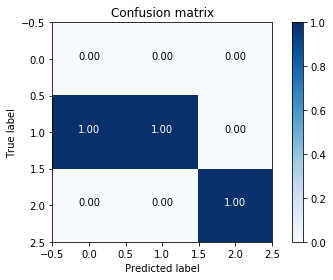

In [134]:
import numpy as np

import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(cnf_matrix, classes=["+","-"],title='Confusion matrix')

In [135]:
data

,question,answer,question_punctuation_removed,question_stopword_removed,question_negated,question_descriptive,question_stemmed,modified_sentence
0,how are you doing today ?,greeting,"[how, are, you, doing, today]",[today],"[how, are, you, doing, today]","[are, doing, today]","[are, do, today]",are do today
1,how is your day ?,greeting,"[how, is, your, day]",[day],"[how, is, your, day]",[day],[day],day
2,good day,greeting,"[good, day]","[good, day]","[good, day]","[good, day]","[good, day]",good day
3,good morning,greeting,"[good, morning]","[good, morning]","[good, morning]","[good, morning]","[good, morn]",good morn
4,Hope you have a lovely and beautiful morning,greeting,"[hope, you, have, a, lovely, and, beautiful, m...","[hope, lovely, beautiful, morning]","[hope, you, have, a, lovely, and, beautiful, m...","[hope, have, lovely, beautiful, morning]","[hope, have, love, beauti, morn]",hope have love beauti morn
5,What a beautiful and pleasant day,greeting,"[what, a, beautiful, and, pleasant, day]","[beautiful, pleasant, day]","[what, a, beautiful, and, pleasant, day]","[beautiful, pleasant, day]","[beauti, pleasant, day]",beauti pleasant day
6,Have a pleasant morning,greeting,"[have, a, pleasant, morning]","[pleasant, morning]","[have, a, pleasant, morning]","[have, pleasant, morning]","[have, pleasant, morn]",have pleasant morn
7,what a lovely morning,greeting,"[what, a, lovely, morning]","[lovely, morning]","[what, a, lovely, morning]","[lovely, morning]","[love, morn]",love morn
8,how is it going today ?,greeting,"[how, is, it, going, today]","[going, today]","[how, is, it, going, today]","[going, today]","[go, today]",go today
9,have a nice day,goodbye,"[have, a, nice, day]","[nice, day]","[have, a, nice, day]","[have, nice, day]","[have, nice, day]",have nice day


In [101]:
import os
import pandas as pd
os.chdir('E:\\python\\csv files')
data=pd.read_csv('Data_chatbot.csv')
data

,question,answer
0,how are you doing today ?,greeting
1,how is your day ?,greeting
2,good day,greeting
3,good morning,greeting
4,Hope you have a lovely and beautiful morning,greeting
5,What a beautiful and pleasant day,greeting
6,Have a pleasant morning,greeting
7,what a lovely morning,greeting
8,how is it going today ?,greeting
9,have a nice day,goodbye


In [106]:
##### Let's change the list of questions into list of words for better visualization
word_list=[]
list_question=list(data["question"])
for sentence in list_question:
    words_sentence=sentence.split()
    for words in words_sentence:
        word_list.append(words)


word_list=[word for sentence in list(data["question"]) for word in sentence.split()]
print(word_list)

['how', 'are', 'you', 'doing', 'today', '?', 'how', 'is', 'your', 'day', '?', 'good', 'day', 'good', 'morning', 'Hope', 'you', 'have', 'a', 'lovely', 'and', 'beautiful', 'morning', 'What', 'a', 'beautiful', 'and', 'pleasant', 'day', 'Have', 'a', 'pleasant', 'morning', 'what', 'a', 'lovely', 'morning', 'how', 'is', 'it', 'going', 'today', '?', 'have', 'a', 'nice', 'day', 'see', 'you', 'later', 'good', 'night', 'bye', 'bye', 'talk', 'to', 'you', 'later', 'see', 'you', 'sometime', 'later', 'have', 'a', 'nice', 'day', 'talk', 'to', 'you', 'soon', 'make', 'me', 'a', 'sandwich', 'can', 'you', 'make', 'a', 'sandwitch', '?', 'having', 'a', 'sandwitch', 'today', '?', "what's", 'for', 'lunch?', 'I', 'want', 'to', 'eat', 'a', 'sandwitch', 'today', 'I', 'do', 'not', 'want', 'a', 'sandwitch', 'today', 'What', 'is', 'in', 'the', 'menu', 'What', 'is', 'for', 'lunch']


In [107]:
fullstr = ','.join(word_list)
fullstr

"how,are,you,doing,today,?,how,is,your,day,?,good,day,good,morning,Hope,you,have,a,lovely,and,beautiful,morning,What,a,beautiful,and,pleasant,day,Have,a,pleasant,morning,what,a,lovely,morning,how,is,it,going,today,?,have,a,nice,day,see,you,later,good,night,bye,bye,talk,to,you,later,see,you,sometime,later,have,a,nice,day,talk,to,you,soon,make,me,a,sandwich,can,you,make,a,sandwitch,?,having,a,sandwitch,today,?,what's,for,lunch?,I,want,to,eat,a,sandwitch,today,I,do,not,want,a,sandwitch,today,What,is,in,the,menu,What,is,for,lunch"

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

documents = [fullstr]
    

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['fullstr'])
df

,and,are,beautiful,bye,can,day,do,doing,eat,for,...,sometime,soon,talk,the,to,today,want,what,you,your
fullstr,2,1,2,2,1,5,1,1,1,2,...,1,1,2,1,3,5,2,5,7,1


In [110]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.]]
